### Tokenizer

In [23]:
import tokenize
from io import BytesIO
import pandas as pd

# Example Python code to tokenize
code = """
def func1(a,b):
    var1 = a+b
    print(var1)
"""

# Convert the code to a BytesIO object required by the tokenize module
code_bytes = BytesIO(code.encode('utf-8'))

# Use the tokenize module to extract tokens
tokens = list(tokenize.tokenize(code_bytes.readline))


# Prepare the token data for visualization
token_data = {
    'Token Type': [],
    'Token String': [],
    'Start Position': [],
    'End Position': [],
    'Line': []
}

for token in tokens:
    if token.type != tokenize.ENCODING and token.type != tokenize.ENDMARKER:  # Skip encoding and endmarker tokens
        token_data['Token Type'].append(tokenize.tok_name[token.type])
        token_data['Token String'].append(token.string)
        token_data['Start Position'].append(token.start)
        token_data['End Position'].append(token.end)
        token_data['Line'].append(token.line.strip() if token.line else '')

# Create a DataFrame from the token data
token_df = pd.DataFrame(token_data)

# Display the DataFrame in the notebook
token_df


,Token Type,Token String,Start Position,End Position,Line
0,NL,\n,"(1, 0)","(1, 1)",
1,NAME,def,"(2, 0)","(2, 3)","def func1(a,b):"
2,NAME,func1,"(2, 4)","(2, 9)","def func1(a,b):"
3,OP,(,"(2, 9)","(2, 10)","def func1(a,b):"
4,NAME,a,"(2, 10)","(2, 11)","def func1(a,b):"
5,OP,",","(2, 11)","(2, 12)","def func1(a,b):"
6,NAME,b,"(2, 12)","(2, 13)","def func1(a,b):"
7,OP,),"(2, 13)","(2, 14)","def func1(a,b):"
8,OP,:,"(2, 14)","(2, 15)","def func1(a,b):"
9,NEWLINE,\n,"(2, 15)","(2, 16)","def func1(a,b):"


### Abstract Syntax Tree AST

In [24]:
import ast


# Sample Python code
code = """
def func1():
    var1 = a+b
    print(a+b)
"""

# Parse the code into an AST
tree = ast.parse(code)

# Print the AST structure in a readable format
print(tree)
# Use ast.dump to visualize the tree
print(ast.dump(tree, indent=4))



Module(
    body=[
        FunctionDef(
            name='func1',
            args=arguments(
                posonlyargs=[],
                args=[],
                kwonlyargs=[],
                kw_defaults=[],
                defaults=[]),
            body=[
                Assign(
                    targets=[
                        Name(id='var1', ctx=Store())],
                    value=BinOp(
                        left=Name(id='a', ctx=Load()),
                        op=Add(),
                        right=Name(id='b', ctx=Load()))),
                Expr(
                    value=Call(
                        func=Name(id='print', ctx=Load()),
                        args=[
                            BinOp(
                                left=Name(id='a', ctx=Load()),
                                op=Add(),
                                right=Name(id='b', ctx=Load()))],
                        keywords=[]))],
            decorator_list=[],
            type_params=[])

In [25]:
# Install graphviz (if not already installed)
!sudo apt-get update
!sudo apt-get install -y graphviz

# Install graphviz Python package
!pip install graphviz


Hit:1 https://dl.yarnpkg.com/debian stable InRelease
Hit:2 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease       
Hit:3 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease                         
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease                 
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease               
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease               
Hit:8 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.


### Control Flow GraphCFG

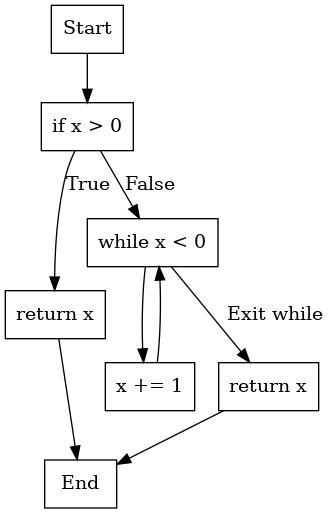

In [26]:
import ast
from graphviz import Digraph
from IPython.display import Image

# Define a simple Python function to analyze
code = """
def example(x):
    if x > 0:
        return x
    else:
        while x < 0:
            x += 1
        return x
"""

# Parse the Python code into an AST
tree = ast.parse(code)

# Create a new graph for the CFG
cfg = Digraph('CFG for example function', format='png')
cfg.attr('node', shape='box')

# Add nodes representing basic blocks of code
cfg.node('Start', 'Start')
cfg.node('Block 1', 'if x > 0')
cfg.node('Block 2', 'return x')
cfg.node('Block 3', 'while x < 0')
cfg.node('Block 4', 'x += 1')
cfg.node('Block 5', 'return x')
cfg.node('End', 'End')

# Define the edges (control flow)
cfg.edge('Start', 'Block 1')
cfg.edge('Block 1', 'Block 2', label='True')
cfg.edge('Block 1', 'Block 3', label='False')
cfg.edge('Block 3', 'Block 4')
cfg.edge('Block 4', 'Block 3')
cfg.edge('Block 3', 'Block 5', label='Exit while')
cfg.edge('Block 5', 'End')
cfg.edge('Block 2', 'End')

# Render the CFG and save it as a file
cfg.render('cfg_example', cleanup=True)

# Display the image inline
Image(filename='cfg_example.png')


### Bytecode

In [27]:
import dis

def example(x):
    if x > 0:
        return x
    else:
        while x < 0:
            x += 1
        return x

def func1(a,b):
    print("Hello world!")

# Disassemble the example function to show its bytecode
dis.dis(example)


  3           0 RESUME                   0

  4           2 LOAD_FAST                0 (x)
              4 LOAD_CONST               1 (0)
              6 COMPARE_OP              68 (>)
             10 POP_JUMP_IF_FALSE        2 (to 16)

  5          12 LOAD_FAST                0 (x)
             14 RETURN_VALUE

  7     >>   16 LOAD_FAST                0 (x)
             18 LOAD_CONST               1 (0)
             20 COMPARE_OP               2 (<)
             24 POP_JUMP_IF_FALSE       11 (to 48)

  8     >>   26 LOAD_FAST                0 (x)
             28 LOAD_CONST               2 (1)
             30 BINARY_OP               13 (+=)
             34 STORE_FAST               0 (x)

  7          36 LOAD_FAST                0 (x)
             38 LOAD_CONST               1 (0)
             40 COMPARE_OP               2 (<)
             44 POP_JUMP_IF_FALSE        1 (to 48)
             46 JUMP_BACKWARD           11 (to 26)

  9     >>   48 LOAD_FAST                0 (x)
            